Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

Loading data set

In [ ]:
dataset = pd.read_csv('play_tennis.csv')
print(dataset.head())

  day   outlook  temp humidity    wind play
0  D1     Sunny   Hot     High    Weak   No
1  D2     Sunny   Hot     High  Strong   No
2  D3  Overcast   Hot     High    Weak  Yes
3  D4      Rain  Mild     High    Weak  Yes
4  D5      Rain  Cool   Normal    Weak  Yes


Use Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical features into numeric
encoder = LabelEncoder()
for col in dataset.columns:
    dataset[col] = encoder.fit_transform(dataset[col])
print(dataset.head())  # Check the encoded data

   day  outlook  temp  humidity  wind  play
0    0        2     1         0     1     0
1    6        2     1         0     0     0
2    7        0     1         0     1     1
3    8        1     2         0     1     1
4    9        1     0         1     1     1


Create a Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Separate features and target
features = dataset.iloc[:, :-1]  # Features (all columns except the last one)
target = dataset.iloc[:, -1]     # Target (the last column)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='entropy')  # Using 'entropy' for ID3 algorithm
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Test the classifier
model_accuracy = classifier.score(X_test, y_test)
print(f"Model Accuracy: {model_accuracy * 100:.2f}%")

Model Accuracy: 66.67%


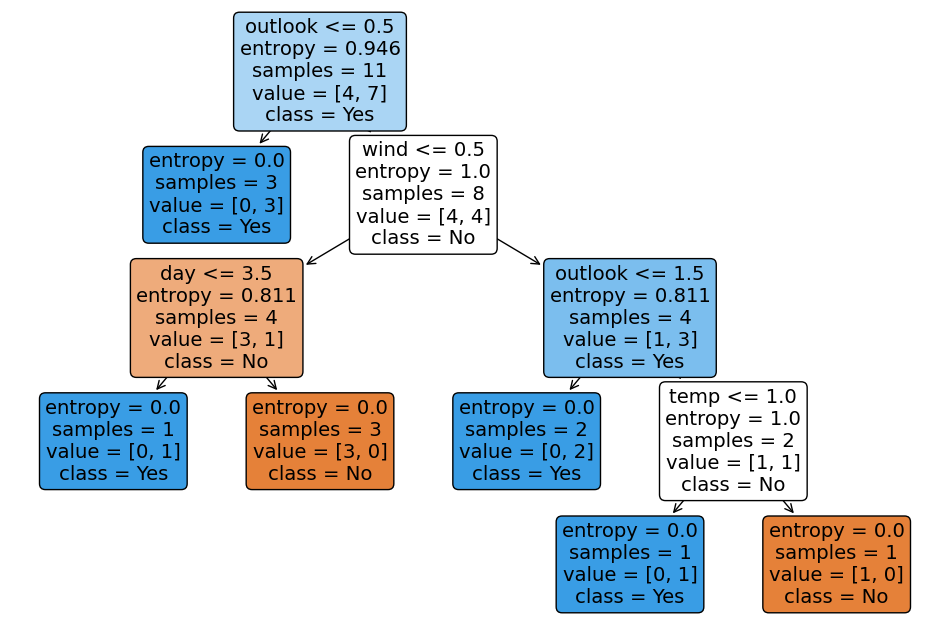

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(classifier, feature_names=features.columns, class_names=encoder.classes_, filled=True, rounded=True)
plt.show()